# 一元线性回归模型的梯度下降实现

> [Machine Learning | Coursera](https://www.coursera.org/specializations/machine-learning-introduction)

依旧使用 `NumPy` 计算, `Matplotlib` 绘图

In [138]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

from src.lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

plt.style.use('seaborn-v0_8')


## 问题描述与数学建模

继续沿用我们在学习[成本函数](https://wiki.virtualguard101.com/notes/ml/cost-func-visual/)时使用数据集案例:

| Size (1000 sqft) | Price ($) |
|:----------------:|:---------:|
|   1   |   300   |
|   2   |   512   |
|   3   |   703   |
|   4   |   905   |
|   5   |   1113  |


In [139]:
x_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_train = np.array([300.0, 512.0, 703.0, 905.0, 1113.0])


## 计算成本函数

In [140]:
def compute_cost(x, y, w, b):
    """计算一元线性回归模型的成本函数
    
    Args:
        x (np.ndarray): 输入数据
        y (np.ndarray): 目标数据
        w (float): 模型参数
        b (float): 模型参数
 
    Returns:
        total_cost (float): 成本函数值
    """
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost


## 应用梯度下降算法

- 有一元线性回归模型函数

    $$
    f_{w, b}(x^{(i)}) = wx^{(i)} + b \quad (1)
    $$

- 成本函数

    $$
    J(w, b) = \frac{1}{2m} \sum_{i=0}^{m-1}(f_{w, b}(x^{(i)}) - y^{(i)})^2 \quad (2)
    $$

- 针对模型参数的梯度下降公式

    $$
    w = w - \alpha\frac{\partial J(w, b)}{\partial w} \quad (3)
    $$

    $$
    b = b - \alpha\frac{\partial J(w, b)}{\partial b} \quad (4)
    $$

    - 其中

        $$
        \frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m}(f_{w, b}(x^{(i)}) - y^{i})x^{(i)} \quad (5)
        $$

        $$
        \frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m}(f_{w, b}(x^{(i)}) - y^{i}) \quad (6)
        $$

有了数学公式的描述，实现它就不是问题了。

### 计算梯度

根据方程 $(5)$、$(6)$，我们可以实现成本函数梯度的计算:

In [141]:
def compute_gradient(x, y, w, b): 
    """计算成本函数对模型参数的梯度
    
    Args:
      x (ndarray (m,)): 数据, m 个样本
      y (ndarray (m,)): 目标值
      w,b (scalar)    : 模型参数  

    Returns:
      dj_dw (scalar): 成本函数对模型参数 w 的梯度
      dj_db (scalar): 成本函数对模型参数 b 的梯度
     """
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db


### 偏导数可视化

可利用 `Matplotlib` 将成本函数的偏导数可视化:

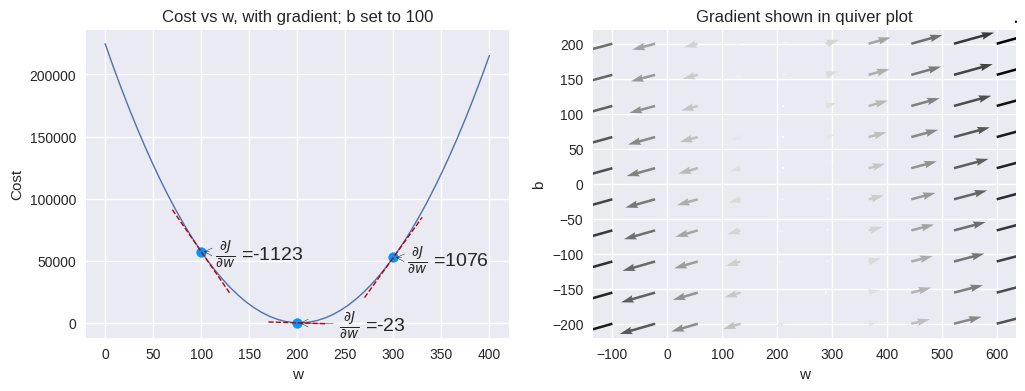

In [142]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()


注意上面的左图固定了参数 $b$，令其等于 $100$。

通过上面的可视化，就不难看出成本函数小极值的大致区域了。

### 实现梯度下降

现在我们可以开始实现最为重要也是最激动人心的部分了:

In [143]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """执行梯度下降算法以拟合参数 w 和 b, 通过学习率 alpha 进行 num_iters 次迭代来更新 w 和 b
    
    Args:
      x (ndarray (m,))  : 输入数据, m 个样本
      y (ndarray (m,))  : 目标数据
      w_in,b_in (scalar): 模型参数的初始值
      alpha (float):      学习率
      num_iters (int):    迭代次数
      cost_function:      成本函数
      gradient_function:  梯度函数
      
    Returns:
      w (scalar): 拟合后的模型参数 w
      b (scalar): 拟合后的模型参数 b
      J_history (List): 每次迭代后的成本函数值
      p_history (list): 每次迭代后的模型参数 [w,b] 
      """
    
    w = copy.deepcopy(w_in) # 避免修改全局变量 w_in
    # 存储每次迭代后的成本函数值和模型参数 w 的数组, 主要用于绘图
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # 计算梯度并更新参数
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # 使用方程 (3) 更新参数
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # 保存每次迭代后的成本函数值
        if i<100000:      # 防止资源耗尽
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # 每 10 次迭代或尽可能多的迭代次数打印一次成本函数值
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history # 返回拟合后的模型参数 w 和 b, 以及每次迭代后的成本函数值和模型参数 [w,b]


运行梯度下降:

In [144]:
# 初始化模型参数
w_init = 0
b_init = 0
# 梯度下降设置
iterations = 10000 # 迭代次数
tmp_alpha = 1.0e-2 # 学习率
# 运行梯度下降
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


Iteration    0: Cost 2.26e+05  dj_dw: -2.524e+03, dj_db: -7.066e+02   w:  2.524e+01, b: 7.06600e+00
Iteration 1000: Cost 1.47e+01  dj_dw:  3.602e-01, dj_db: -1.300e+00   w:  2.040e+02, b: 9.32199e+01
Iteration 2000: Cost 9.49e+00  dj_dw:  6.634e-02, dj_db: -2.395e-01   w:  2.023e+02, b: 9.94856e+01
Iteration 3000: Cost 9.32e+00  dj_dw:  1.222e-02, dj_db: -4.411e-02   w:  2.020e+02, b: 1.00640e+02
Iteration 4000: Cost 9.31e+00  dj_dw:  2.250e-03, dj_db: -8.124e-03   w:  2.019e+02, b: 1.00852e+02
Iteration 5000: Cost 9.31e+00  dj_dw:  4.144e-04, dj_db: -1.496e-03   w:  2.019e+02, b: 1.00891e+02
Iteration 6000: Cost 9.31e+00  dj_dw:  7.632e-05, dj_db: -2.755e-04   w:  2.019e+02, b: 1.00898e+02
Iteration 7000: Cost 9.31e+00  dj_dw:  1.406e-05, dj_db: -5.074e-05   w:  2.019e+02, b: 1.00900e+02
Iteration 8000: Cost 9.31e+00  dj_dw:  2.589e-06, dj_db: -9.345e-06   w:  2.019e+02, b: 1.00900e+02
Iteration 9000: Cost 9.31e+00  dj_dw:  4.767e-07, dj_db: -1.721e-06   w:  2.019e+02, b: 1.00900e+02


### 成本与梯度下降迭代次数

成本随迭代次数的变化图是衡量梯度下降进展的有效指标。成功运行后，成本应持续下降。由于初始阶段成本变化极为迅速，将初始下降与最终下降分别以不同比例绘制图表十分有用。注意下方图表中坐标轴上的成本比例及迭代步数:


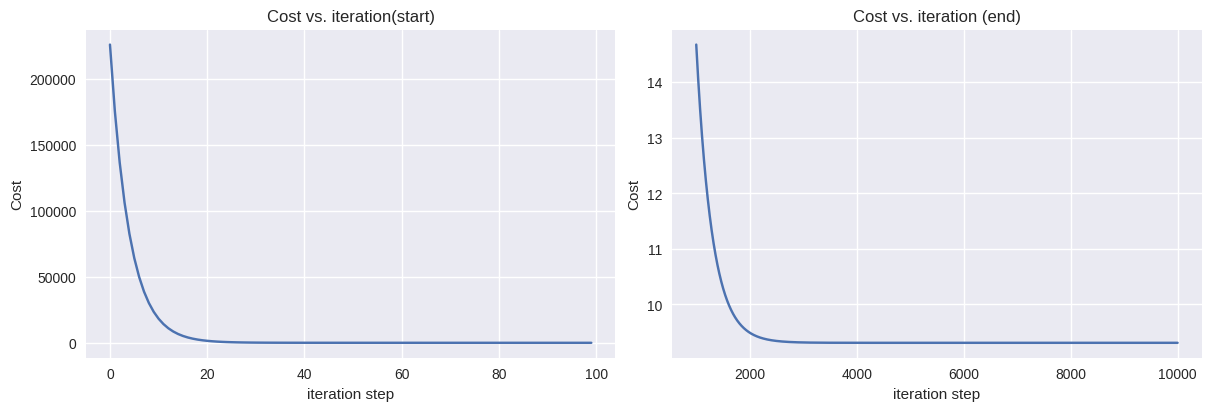

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()


## 应用模型（预测）

这里模型的最优参数已经找到了，将其代入模型函数即可将模型投入应用:

In [146]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")


1000 sqft house prediction 302.8 Thousand dollars
1200 sqft house prediction 343.2 Thousand dollars
2000 sqft house prediction 504.7 Thousand dollars


## 梯度下降过程可视化

可通过等值线数据图来形象化梯度下降算法每次迭代的成本函数值的变化，以理解梯度下降的实施过程:

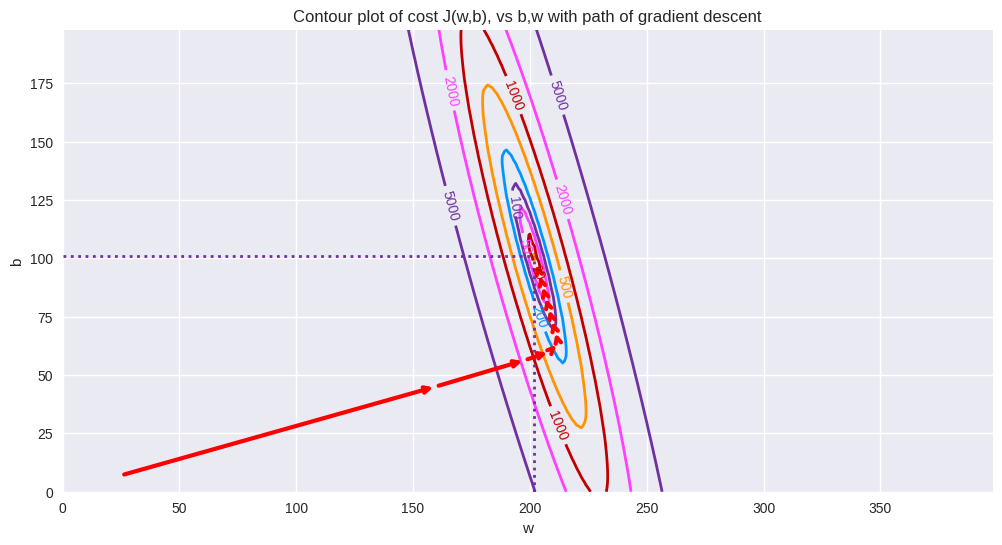

In [147]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax, 
                  w_range=[0, 400, 2], 
                  b_range=[0, 200, 2],
                  contours=[5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000],
                  w_final=201.9, b_final=100.9)


通过这个等值线图不难看出以下特点:

- 这个梯度下降算法的下降路径是**单调**的

- 初始状态的步长远大于接近目标时的步长

下面我们放大来看，可以更清晰地看到最后几步:

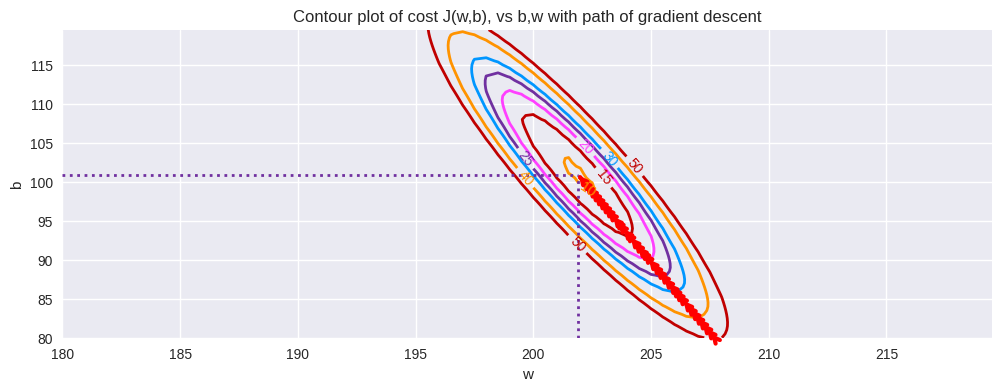

In [148]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, 
                  w_range=[180, 220, 0.5], 
                  b_range=[80, 120, 0.5],
                  contours=[5, 10, 15, 20, 25, 30, 40, 50], 
                  resolution=0.5,
                  w_final=201.9, b_final=100.9)


不难发现，随着梯度逐渐趋于 $0$，步长是越来越小的。


## 调整学习率

在先前的理论学习中，我们知道梯度下降的速度与学习率 $\alpha$ 是息息相关的，比如当它过大时就会造成成本函数值发散而不是收敛，从而使得 $w$ 和 $b$ 来回震荡。

下面我们可以通过可视化的方式来理解这个过程:


In [149]:
# 1. 学习率过小 - 收敛速度过慢
print("1. Learning rate too small (alpha = 0.001):")
w_init = 0
b_init = 0
iterations = 100
tmp_alpha = 1.0e-3
w_final_small, b_final_small, J_hist_small, p_hist_small = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, 
                                                                           iterations, compute_cost, compute_gradient)
print(f"Final parameters: w={w_final_small:.2f}, b={b_final_small:.2f}, cost={J_hist_small[-1]:.2f}\n")



1. Learning rate too small (alpha = 0.001):
Iteration    0: Cost 2.84e+05  dj_dw: -2.524e+03, dj_db: -7.066e+02   w:  2.524e+00, b: 7.06600e-01
Iteration   10: Cost 2.24e+05  dj_dw: -2.240e+03, dj_db: -6.281e+02   w:  2.617e+01, b: 7.33312e+00
Iteration   20: Cost 1.76e+05  dj_dw: -1.989e+03, dj_db: -5.584e+02   w:  4.717e+01, b: 1.32239e+01
Iteration   30: Cost 1.39e+05  dj_dw: -1.765e+03, dj_db: -4.965e+02   w:  6.580e+01, b: 1.84615e+01
Iteration   40: Cost 1.10e+05  dj_dw: -1.567e+03, dj_db: -4.416e+02   w:  8.235e+01, b: 2.31192e+01
Iteration   50: Cost 8.64e+04  dj_dw: -1.391e+03, dj_db: -3.928e+02   w:  9.703e+01, b: 2.72620e+01
Iteration   60: Cost 6.81e+04  dj_dw: -1.235e+03, dj_db: -3.495e+02   w:  1.101e+02, b: 3.09477e+01
Iteration   70: Cost 5.37e+04  dj_dw: -1.096e+03, dj_db: -3.111e+02   w:  1.216e+02, b: 3.42276e+01
Iteration   80: Cost 4.24e+04  dj_dw: -9.727e+02, dj_db: -2.769e+02   w:  1.319e+02, b: 3.71472e+01
Iteration   90: Cost 3.34e+04  dj_dw: -8.634e+02, dj_db:

In [150]:
# 2. 学习率合适 - 快速收敛
print("2. Learning rate appropriate (alpha = 0.01):")
w_init = 0
b_init = 0
iterations = 100
tmp_alpha = 1.0e-2
w_final_good, b_final_good, J_hist_good, p_hist_good = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, 
                                                                        iterations, compute_cost, compute_gradient)
print(f"Final parameters: w={w_final_good:.2f}, b={b_final_good:.2f}, cost={J_hist_good[-1]:.2f}\n")


2. Learning rate appropriate (alpha = 0.01):
Iteration    0: Cost 2.26e+05  dj_dw: -2.524e+03, dj_db: -7.066e+02   w:  2.524e+01, b: 7.06600e+00
Iteration   10: Cost 1.83e+04  dj_dw: -7.151e+02, dj_db: -2.055e+02   w:  1.598e+02, b: 4.50978e+01
Iteration   20: Cost 1.62e+03  dj_dw: -2.017e+02, dj_db: -6.321e+01   w:  1.979e+02, b: 5.63842e+01
Iteration   30: Cost 2.70e+02  dj_dw: -5.593e+01, dj_db: -2.272e+01   w:  2.086e+02, b: 6.00694e+01
Iteration   40: Cost 1.57e+02  dj_dw: -1.458e+01, dj_db: -1.114e+01   w:  2.115e+02, b: 6.15886e+01
Iteration   50: Cost 1.44e+02  dj_dw: -2.860e+00, dj_db: -7.779e+00   w:  2.122e+02, b: 6.24850e+01
Iteration   60: Cost 1.39e+02  dj_dw:  4.448e-01, dj_db: -6.746e+00   w:  2.122e+02, b: 6.31967e+01
Iteration   70: Cost 1.34e+02  dj_dw:  1.362e+00, dj_db: -6.377e+00   w:  2.121e+02, b: 6.38483e+01
Iteration   80: Cost 1.30e+02  dj_dw:  1.602e+00, dj_db: -6.197e+00   w:  2.120e+02, b: 6.44753e+01
Iteration   90: Cost 1.26e+02  dj_dw:  1.649e+00, dj_db

In [151]:
# 3. 学习率过大 - 震荡且发散
print("3. Learning rate too large (alpha = 0.1):")
w_init = 0
b_init = 0
iterations = 20
tmp_alpha = 1.0e-1
w_final_large, b_final_large, J_hist_large, p_hist_large = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, 
                                                                            iterations, compute_cost, compute_gradient)
print(f"Final parameters: w={w_final_large:.2f}, b={b_final_large:.2f}, cost={J_hist_large[-1]:.2f}\n")


3. Learning rate too large (alpha = 0.1):
Iteration    0: Cost 9.89e+03  dj_dw: -2.524e+03, dj_db: -7.066e+02   w:  2.524e+02, b: 7.06600e+01
Iteration    2: Cost 1.64e+02  dj_dw: -8.278e+01, dj_db: -3.028e+01   w:  2.142e+02, b: 6.15736e+01
Iteration    4: Cost 1.43e+02  dj_dw: -1.011e+00, dj_db: -7.382e+00   w:  2.126e+02, b: 6.25534e+01
Iteration    6: Cost 1.34e+02  dj_dw:  1.671e+00, dj_db: -6.401e+00   w:  2.122e+02, b: 6.38276e+01
Iteration    8: Cost 1.26e+02  dj_dw:  1.703e+00, dj_db: -6.162e+00   w:  2.118e+02, b: 6.50700e+01
Iteration   10: Cost 1.18e+02  dj_dw:  1.649e+00, dj_db: -5.955e+00   w:  2.115e+02, b: 6.62711e+01
Iteration   12: Cost 1.11e+02  dj_dw:  1.594e+00, dj_db: -5.755e+00   w:  2.112e+02, b: 6.74320e+01
Iteration   14: Cost 1.05e+02  dj_dw:  1.541e+00, dj_db: -5.562e+00   w:  2.109e+02, b: 6.85540e+01
Iteration   16: Cost 9.83e+01  dj_dw:  1.489e+00, dj_db: -5.376e+00   w:  2.106e+02, b: 6.96384e+01
Iteration   18: Cost 9.24e+01  dj_dw:  1.439e+00, dj_db: -

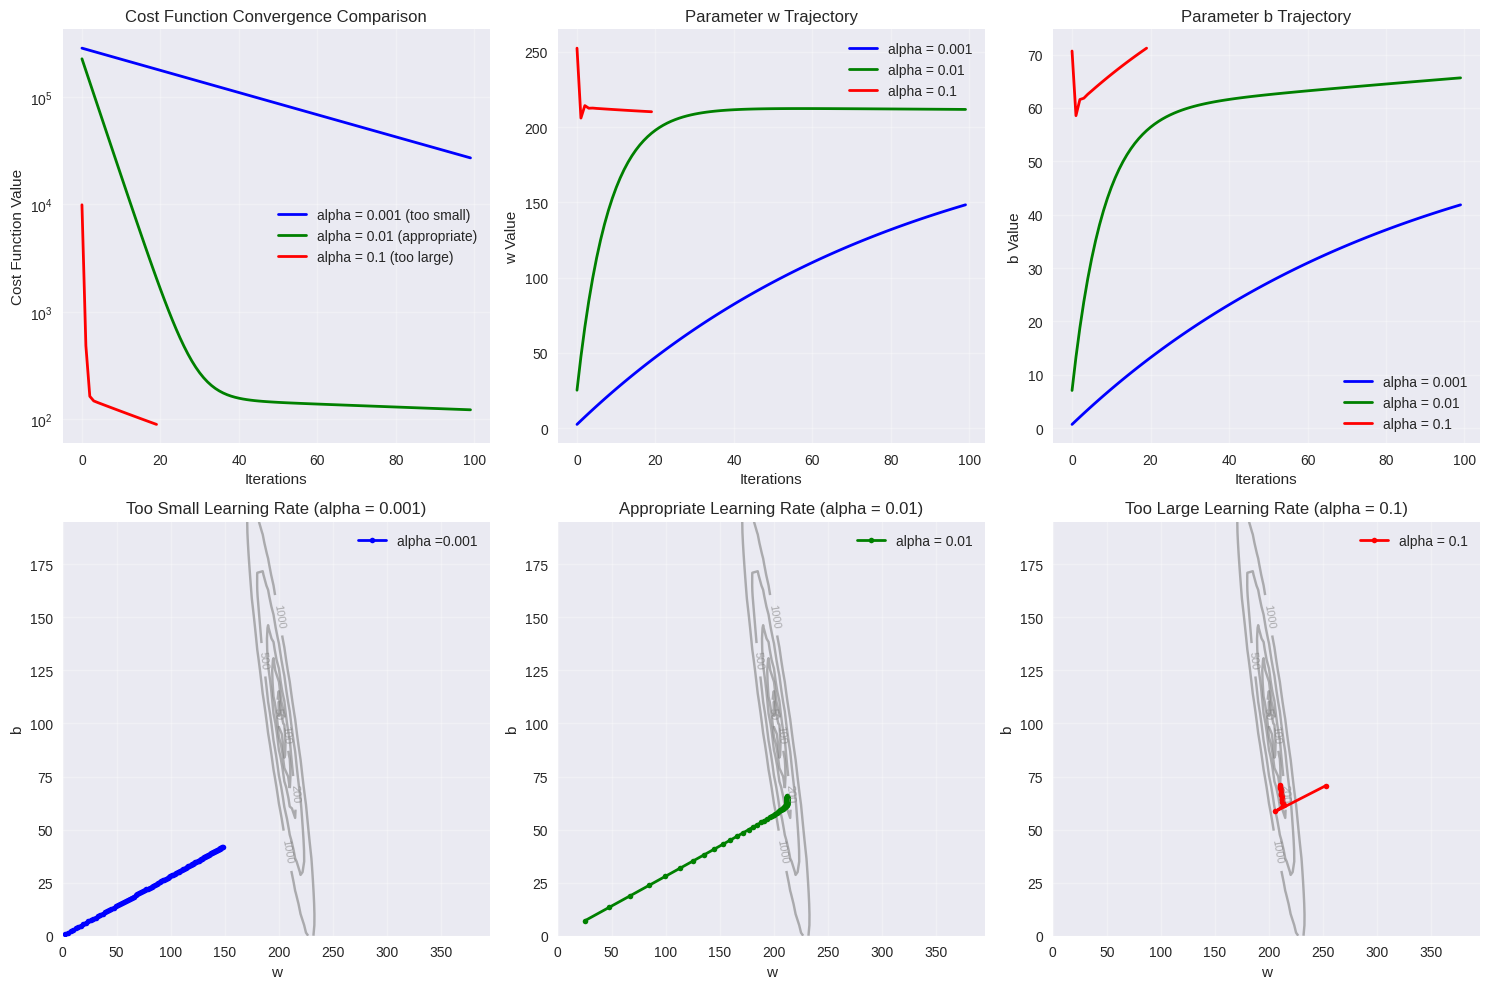

In [152]:
# 创建改进的学习率对比可视化
def plot_learning_rate_comparison(p_hist_small, J_hist_small, p_hist_good, J_hist_good, p_hist_large, J_hist_large, x_train, y_train):
    """绘制学习率对比图"""
    fig = plt.figure(figsize=(15, 10))
    
    # 1. 成本函数收敛对比
    ax1 = plt.subplot(2, 3, 1)
    plt.plot(J_hist_small, 'b-', label='alpha = 0.001 (too small)', linewidth=2)
    plt.plot(J_hist_good, 'g-', label='alpha = 0.01 (appropriate)', linewidth=2)
    plt.plot(J_hist_large, 'r-', label='alpha = 0.1 (too large)', linewidth=2)
    plt.title('Cost Function Convergence Comparison')
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')  # 使用对数坐标更好地显示差异
    
    # 2. 参数w的变化轨迹
    ax2 = plt.subplot(2, 3, 2)
    w_small = [p[0] for p in p_hist_small]
    w_good = [p[0] for p in p_hist_good]
    w_large = [p[0] for p in p_hist_large]
    
    plt.plot(w_small, 'b-', label='alpha = 0.001', linewidth=2)
    plt.plot(w_good, 'g-', label='alpha = 0.01', linewidth=2)
    plt.plot(w_large, 'r-', label='alpha = 0.1', linewidth=2)
    plt.title('Parameter w Trajectory')
    plt.xlabel('Iterations')
    plt.ylabel('w Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. 参数b的变化轨迹
    ax3 = plt.subplot(2, 3, 3)
    b_small = [p[1] for p in p_hist_small]
    b_good = [p[1] for p in p_hist_good]
    b_large = [p[1] for p in p_hist_large]
    
    plt.plot(b_small, 'b-', label='alpha = 0.001', linewidth=2)
    plt.plot(b_good, 'g-', label='alpha = 0.01', linewidth=2)
    plt.plot(b_large, 'r-', label='alpha = 0.1', linewidth=2)
    plt.title('Parameter b Trajectory')
    plt.xlabel('Iterations')
    plt.ylabel('b Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4. 2D等值线图 - 过小学习率
    ax4 = plt.subplot(2, 3, 4)
    w_range = np.arange(0, 400, 5)
    b_range = np.arange(0, 200, 5)
    W, B = np.meshgrid(w_range, b_range)
    Z = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            Z[i, j] = compute_cost(x_train, y_train, W[i, j], B[i, j])
    
    CS = ax4.contour(W, B, Z, levels=[5, 10, 20, 50, 100, 200, 500, 1000], colors='gray', alpha=0.6)
    ax4.clabel(CS, inline=1, fontsize=8)
    
    # 绘制轨迹
    w_path = [p[0] for p in p_hist_small]
    b_path = [p[1] for p in p_hist_small]
    ax4.plot(w_path, b_path, 'b-o', markersize=4, linewidth=2, label='alpha =0.001')
    ax4.set_title('Too Small Learning Rate (alpha = 0.001)')
    ax4.set_xlabel('w')
    ax4.set_ylabel('b')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. 2D等值线图 - 合适学习率
    ax5 = plt.subplot(2, 3, 5)
    CS = ax5.contour(W, B, Z, levels=[5, 10, 20, 50, 100, 200, 500, 1000], colors='gray', alpha=0.6)
    ax5.clabel(CS, inline=1, fontsize=8)
    
    w_path = [p[0] for p in p_hist_good]
    b_path = [p[1] for p in p_hist_good]
    ax5.plot(w_path, b_path, 'g-o', markersize=4, linewidth=2, label='alpha = 0.01')
    ax5.set_title('Appropriate Learning Rate (alpha = 0.01)')
    ax5.set_xlabel('w')
    ax5.set_ylabel('b')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # 6. 2D等值线图 - 过大学习率
    ax6 = plt.subplot(2, 3, 6)
    CS = ax6.contour(W, B, Z, levels=[5, 10, 20, 50, 100, 200, 500, 1000], colors='gray', alpha=0.6)
    ax6.clabel(CS, inline=1, fontsize=8)
    
    w_path = [p[0] for p in p_hist_large]
    b_path = [p[1] for p in p_hist_large]
    ax6.plot(w_path, b_path, 'r-o', markersize=4, linewidth=2, label='alpha = 0.1')
    ax6.set_title('Too Large Learning Rate (alpha = 0.1)')
    ax6.set_xlabel('w')
    ax6.set_ylabel('b')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_learning_rate_comparison(p_hist_small, J_hist_small, p_hist_good, J_hist_good, p_hist_large, J_hist_large, x_train, y_train)


Iteration    0: Cost 1.89e+06  dj_dw: -2.524e+03, dj_db: -7.066e+02   w:  7.571e+02, b: 2.11980e+02
Iteration    3: Cost 5.18e+08  dj_dw:  4.184e+04, dj_db:  1.158e+04   w: -8.805e+03, b:-2.43029e+03
Iteration    6: Cost 1.42e+11  dj_dw: -6.932e+05, dj_db: -1.920e+05   w:  1.496e+05, b: 4.14453e+04
Iteration    9: Cost 3.90e+13  dj_dw:  1.148e+07, dj_db:  3.181e+06   w: -2.474e+06, b:-6.85376e+05
Iteration   12: Cost 1.07e+16  dj_dw: -1.903e+08, dj_db: -5.270e+07   w:  4.100e+07, b: 1.13563e+07
Iteration   15: Cost 2.94e+18  dj_dw:  3.152e+09, dj_db:  8.732e+08   w: -6.793e+08, b:-1.88143e+08
Iteration   18: Cost 8.07e+20  dj_dw: -5.223e+10, dj_db: -1.447e+10   w:  1.125e+10, b: 3.11705e+09
Iteration   21: Cost 2.21e+23  dj_dw:  8.653e+11, dj_db:  2.397e+11   w: -1.864e+11, b:-5.16415e+10
Iteration   24: Cost 6.08e+25  dj_dw: -1.434e+13, dj_db: -3.971e+12   w:  3.089e+12, b: 8.55567e+11
Iteration   27: Cost 1.67e+28  dj_dw:  2.375e+14, dj_db:  6.578e+13   w: -5.117e+13, b:-1.41746e+13


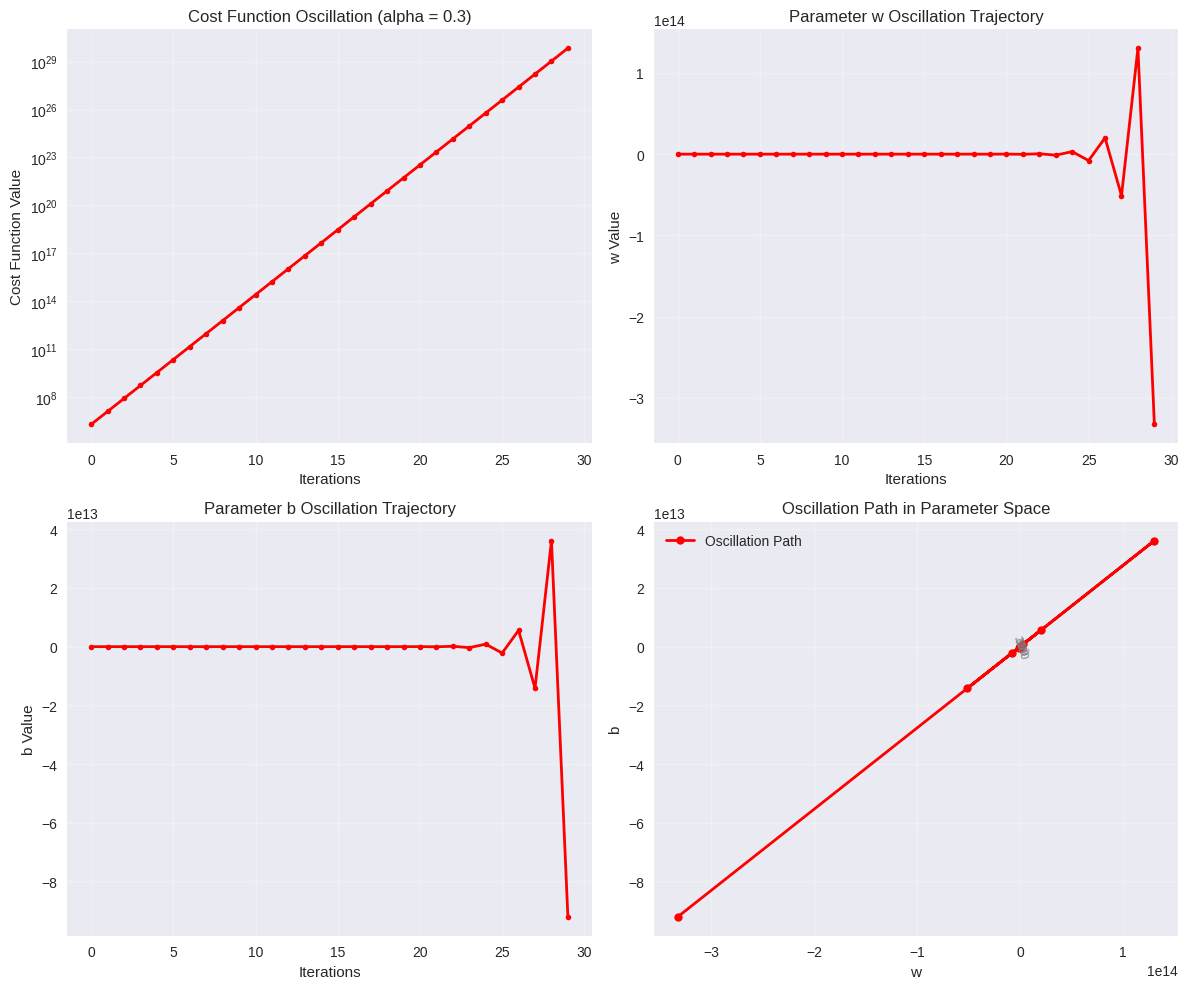

Oscillation Demo Results:
Final parameters: w=-332576779990885.75, b=-92118435171622.81
Final cost: 704492490931754198708346945536.00
Cost range: 1886423.45 - 704492490931754198708346945536.00
Parameter w range: -332576779990885.75 - 130458817210248.47
Parameter b range: -92118435171622.81 - 36135000453412.59


In [153]:
# 使用更大的学习率来展示明显的震荡
w_init = 0
b_init = 0
iterations = 30
tmp_alpha = 0.3  # 更大的学习率
w_final_osc, b_final_osc, J_hist_osc, p_hist_osc = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, 
                                                                   iterations, compute_cost, compute_gradient)

# 创建震荡效果的可视化
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# 1. 成本函数震荡
ax1.plot(J_hist_osc, 'r-', linewidth=2, marker='o', markersize=4)
ax1.set_title('Cost Function Oscillation (alpha = 0.3)')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost Function Value')
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# 2. 参数w的震荡轨迹
w_osc = [p[0] for p in p_hist_osc]
ax2.plot(w_osc, 'r-', linewidth=2, marker='o', markersize=4)
ax2.set_title('Parameter w Oscillation Trajectory')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('w Value')
ax2.grid(True, alpha=0.3)

# 3. 参数b的震荡轨迹
b_osc = [p[1] for p in p_hist_osc]
ax3.plot(b_osc, 'r-', linewidth=2, marker='o', markersize=4)
ax3.set_title('Parameter b Oscillation Trajectory')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('b Value')
ax3.grid(True, alpha=0.3)

# 4. 2D参数空间中的震荡路径
w_range = np.arange(-50, 300, 2)
b_range = np.arange(-50, 200, 2)
W, B = np.meshgrid(w_range, b_range)
Z = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i, j] = compute_cost(x_train, y_train, W[i, j], B[i, j])

# 绘制等值线
CS = ax4.contour(W, B, Z, levels=[5, 10, 20, 50, 100, 200, 500, 1000, 2000], colors='gray', alpha=0.6)
ax4.clabel(CS, inline=1, fontsize=8)

# 绘制震荡路径
ax4.plot(w_osc, b_osc, 'r-o', markersize=6, linewidth=2, label='Oscillation Path')
ax4.set_title('Oscillation Path in Parameter Space')
ax4.set_xlabel('w')
ax4.set_ylabel('b')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Oscillation Demo Results:")
print(f"Final parameters: w={w_final_osc:.2f}, b={b_final_osc:.2f}")
print(f"Final cost: {J_hist_osc[-1]:.2f}")
print(f"Cost range: {min(J_hist_osc):.2f} - {max(J_hist_osc):.2f}")
print(f"Parameter w range: {min(w_osc):.2f} - {max(w_osc):.2f}")
print(f"Parameter b range: {min(b_osc):.2f} - {max(b_osc):.2f}")
